In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [ ]:
np.random.seed(42)
SIZE = 256

In [ ]:
imgpath = '/content/download.jpg'

img_data = []

img = cv2.imread(imgpath, 1) # 1 for color, 0 for greyscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.0

In [ ]:
model = Sequential()

# Encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Bottleneck
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

# Decoder
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 32, 32, 8)        

In [ ]:
model.fit(img_array, img_array, epochs = 500, shuffle = True)

Epoch 1/500
1/1 [==============================] - 1s 667ms/step - loss: 0.2023 - accuracy: 0.1365
Epoch 2/500
1/1 [==============================] - 0s 387ms/step - loss: 0.2023 - accuracy: 0.1379
Epoch 3/500
1/1 [==============================] - 0s 475ms/step - loss: 0.2021 - accuracy: 0.1336
Epoch 4/500
1/1 [==============================] - 0s 436ms/step - loss: 0.2022 - accuracy: 0.1270
Epoch 5/500
1/1 [==============================] - 0s 343ms/step - loss: 0.2023 - accuracy: 0.1231
Epoch 6/500
1/1 [==============================] - 0s 368ms/step - loss: 0.2024 - accuracy: 0.1211
Epoch 7/500
1/1 [==============================] - 0s 416ms/step - loss: 0.2023 - accuracy: 0.1206
Epoch 8/500
1/1 [==============================] - 0s 424ms/step - loss: 0.2021 - accuracy: 0.1205
Epoch 9/500
1/1 [==============================] - 0s 279ms/step - loss: 0.2019 - accuracy: 0.1207
Epoch 10/500
1/1 [==============================] - 0s 219ms/step - loss: 0.2019 - accuracy: 0.1212
Epoch 11/

1/1 [==============================] - 0s 64ms/step


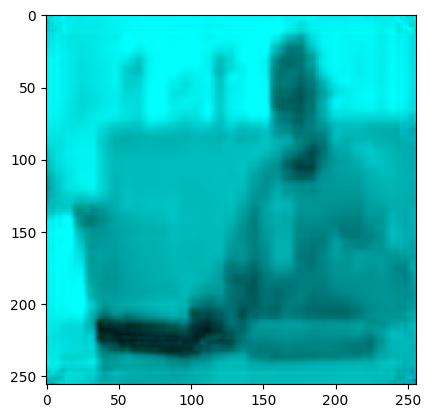

In [ ]:
pred = model.predict(img_array)
plt.imshow(pred[0].reshape(SIZE, SIZE, 3))